In [1]:
#Decision Trees

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

In [2]:
df1_train=pd.read_csv(r"C:\Users\vkatepally\Decision_Tree\train.csv")

In [3]:
df1_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df1_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df1_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Removing the cabin  and age columns because most of teh data is mising
df1=df1_train.drop(axis=1,labels=["Cabin"])

In [7]:
imp=Imputer(missing_values='NaN',strategy='mean')
df1['Age'] = imp.fit_transform(df1['Age'].values.reshape(-1,1))

In [8]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [9]:
#df1=df1.infer_objects()
#df1['Embarked']=df1['Embarked'].astype('string')
#print(df1.dtypes)
#imp=Imputer(missing_values='NaN',strategy="most_frequent")
#df1['Embarked']=imp.fit_transform(df1["Embarked"].values.reshape(-1,1))

In [10]:
df1.dtypes
#sex feature is object convert it to category
df1['Sex']=df1['Sex'].astype('category')
print(df1.dtypes)

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
dtype: object


In [11]:
#convert sex feature to numeric
#this also can be done using label encoder of scikit learn
#df1['Sex'][df1.Sex=='female']=1
#df1['Sex'][df1.Sex=='male']=0
from sklearn import preprocessing
print(df1['Sex'].value_counts())
le=preprocessing.LabelEncoder()

df1['Sex']=le.fit_transform(df1['Sex'])
#le.inverse_transform(['female','male'])
print(df1['Sex'].unique())



male      577
female    314
Name: Sex, dtype: int64
[1 0]


In [12]:
columns = ['Pclass','Sex','Age','Fare','Parch','SibSp']
X=df1[columns]
y=df1['Survived']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train
#y_train

In [14]:

from sklearn.tree import  DecisionTreeClassifier
#here all the parameters are default
#criterion:default -gini
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
print("Accuracy score using gini criterion of train data", clf.score(X_train,y_train))
print("Accuracy score using gini criterion of test data", clf.score(X_test,y_test))
#print(clf.score(X_test,y_test))

#using the criteruion as entropy and check if there is increase in accuracy
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)
print("Accuracy score using entropy criterion of train data", clf.score(X_train,y_train))
print("Accuracy score using entropy criterion of test data", clf.score(X_test,y_test))


Accuracy score using gini criterion of train data 0.9803370786516854
Accuracy score using gini criterion of test data 0.7597765363128491
Accuracy score using entropy criterion of train data 0.9803370786516854
Accuracy score using entropy criterion of test data 0.776536312849162


# max_features : int, float, string or None, optional (default=None)
    The number of features to consider when looking for the best split:

        - If int, then consider `max_features` features at each split.
        - If float, then `max_features` is a percentage and
          `int(max_features * n_features)` features are considered at each
          split.
        - If "auto", then `max_features=sqrt(n_features)`.
        - If "sqrt", then `max_features=sqrt(n_features)`.
        - If "log2", then `max_features=log2(n_features)`.
        - If None, then `max_features=n_features`.

6


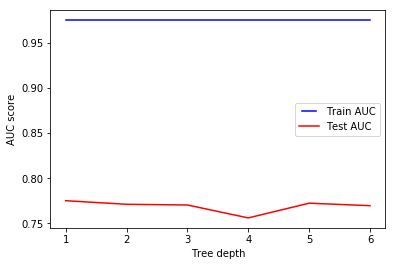

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import *
#fine tuning the hyper parameters
print((len(columns)))
train_score=[]
test_score=[]
auc_train=[]
auc_test=[]
#max_features=range(len(columns)-1)
max_features=np.arange(1,len(columns)+1,1)
for i in max_features:
    clf=DecisionTreeClassifier(criterion='entropy',max_features=i)
    clf.fit(X_train,y_train)
    
    train_pred=clf.predict(X_train)
    fpr_train,tpr_train,a_train=roc_curve(y_train,train_pred)
    auc_train.append(auc(fpr_train,tpr_train))
    
    
    
    test_pred=clf.predict(X_test)
    fpr_test,tpr_test,a_test=roc_curve(y_true=y_test,y_score=test_pred)
    auc_test.append(auc(fpr_test,tpr_test))
    
    
    train_score.append(clf.score(X_train,y_train))
    test_score.append(clf.score(X_test,y_test))
   
    #print("number of features",i+1)
    #print("Accuracy score using gini criterion of train data", clf.score(X_train,y_train))
    #print("Accuracy score using gini criterion of test data", clf.score(X_test,y_test))



from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, auc_train, 'b', label='Train AUC')
line2, = plt.plot(max_features, auc_test, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()
    
#plt.plot(max_features,train_score)
#plt.plot(max_features,test_score)
#plt.xlabel("max_features")
#plt.ylabel('Accuracy')
#plt.lab("training_score","test_score")
    
#for i in range(len(columns)-1)


#clf=DecisionTreeClassifier(criterion='entropy',max_features=)
#clf.fit(X_train,y_train)
#print("Accuracy score using gini criterion", clf.score(X_test,y_test))

# max_depth : int or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

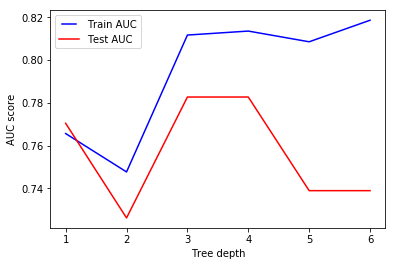

In [17]:
max_depth=np.arange(1,7,1)

train_score=[]
test_score=[]
auc_train=[]
auc_test=[]
for i in max_depth:
    clf=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    clf.fit(X_train,y_train)
    
    train_pred=clf.predict(X_train)
    fpr_train,tpr_train,a_train=roc_curve(y_train,train_pred)
    auc_train.append(auc(fpr_train,tpr_train))
    
    
    
    test_pred=clf.predict(X_test)
    fpr_test,tpr_test,a_test=roc_curve(y_true=y_test,y_score=test_pred)
    auc_test.append(auc(fpr_test,tpr_test))
    
    
    train_score.append(clf.score(X_train,y_train))
    test_score.append(clf.score(X_test,y_test))
   
    #print("number of features",i+1)
    #print("Accuracy score using gini criterion of train data", clf.score(X_train,y_train))
    #print("Accuracy score using gini criterion of test data", clf.score(X_test,y_test))



from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, auc_train, 'b', label='Train AUC')
line2, = plt.plot(max_depth, auc_test, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()


[0.20347089 0.43083098 0.15838632 0.15098791 0.00561902 0.05070488]


<BarContainer object of 6 artists>

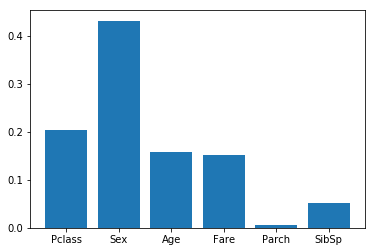

In [18]:
#feature importance
print(clf.feature_importances_)
plt.bar(columns,clf.feature_importances_)

In [116]:
#cross validation
from sklearn.model_selection import KFold

cv=KFold(n_splits=10,random_state=52,shuffle=True)

X1=df1_train

columns = ['Pclass','Sex','Age','Fare','Parch','SibSp']
X=X1[columns]
y=X1['Survived']



for train_index,test_index in cv.split(X):
    #print(train_index )
    #print(test_index)
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    #clf.fit(X_train,y_train)
    #print(clf.score(X_test,y_test))
    

    

KeyError: '[  0   1   2   3   4   5   7   8   9  10  12  13  14  15  16  17  19  21\n  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  38  39  40\n  41  42  43  44  45  47  48  49  50  51  52  53  54  55  56  57  58  59\n  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77\n  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95\n  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113\n 115 116 118 119 121 122 123 124 125 126 128 129 130 131 132 133 134 135\n 136 137 138 139 140 141 142 144 145 146 147 148 151 152 153 154 156 158\n 159 160 161 162 163 165 166 167 168 169 170 171 172 173 174 175 176 177\n 178 179 180 181 182 183 184 186 188 189 190 192 194 195 196 197 198 199\n 200 201 202 203 204 205 206 208 209 211 212 213 214 215 216 217 218 219\n 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237\n 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 256\n 258 259 260 261 262 263 264 265 266 267 268 269 271 272 273 275 276 277\n 278 279 280 281 282 283 284 285 286 287 288 290 291 292 293 294 295 296\n 297 298 299 300 301 302 303 304 305 306 307 309 310 311 312 315 316 317\n 319 320 321 322 323 324 325 326 327 328 329 330 332 333 334 335 336 337\n 338 339 340 341 342 343 344 345 346 347 348 350 351 353 354 355 356 357\n 358 359 360 361 362 363 364 365 366 367 368 369 370 371 373 374 375 378\n 379 380 381 382 383 384 385 386 388 389 390 391 392 393 395 396 397 398\n 399 400 401 402 403 404 405 407 408 410 411 412 413 414 415 416 417 418\n 419 421 422 423 424 425 426 427 428 429 430 431 434 435 436 437 438 439\n 440 441 442 443 444 445 446 447 449 450 451 452 454 456 457 458 459 460\n 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478\n 479 480 481 483 484 485 486 487 488 489 490 491 492 493 494 496 497 498\n 499 500 501 502 503 504 507 508 509 510 511 512 513 514 515 516 517 518\n 519 520 521 522 523 524 525 526 527 529 530 532 533 534 535 537 538 539\n 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557\n 558 559 561 562 563 564 566 567 568 570 571 572 573 574 575 576 579 581\n 582 583 584 585 586 587 588 589 591 592 593 594 595 596 597 598 600 601\n 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620\n 621 623 624 625 626 628 629 630 631 633 634 635 636 637 638 639 641 642\n 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661\n 662 663 664 665 667 668 669 670 672 673 675 676 677 678 680 681 682 683\n 684 685 686 687 688 689 691 692 693 694 695 696 697 699 700 701 702 703\n 704 705 706 707 708 709 710 711 712 713 715 716 717 718 719 720 721 723\n 724 725 726 727 728 729 731 732 733 734 736 737 738 739 740 741 742 743\n 744 745 746 748 749 750 751 752 753 754 755 756 757 758 759 760 761 762\n 763 764 765 766 767 769 770 771 772 774 775 776 777 778 779 780 781 782\n 783 784 786 787 788 789 790 791 793 794 795 796 797 798 799 800 801 802\n 803 804 805 806 807 809 810 811 812 813 814 815 817 818 819 820 821 822\n 823 825 826 827 828 829 830 831 832 833 835 836 837 838 839 840 842 843\n 844 845 846 847 848 849 850 851 852 853 854 855 856 857 858 859 860 861\n 862 863 864 865 866 867 868 869 870 872 873 874 875 876 877 878 879 880\n 881 882 883 884 886 887 888 889 890] not in index'

1
2
3
4
5
6
7
8
9
9


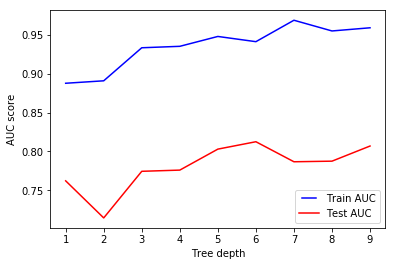

[0.7620978120978121, 0.7143500643500643, 0.7743886743886744, 0.7759330759330759, 0.802960102960103, 0.8124839124839125, 0.7866795366795367, 0.7874517374517374, 0.806949806949807]


In [41]:
#random forest implementation

from sklearn.ensemble import RandomForestClassifier



#n-estimators hyper parameter tuning
auc_train=[]
auc_test=[]
train_score=[]
test_score=[]


for i in np.arange(1,10,1):
    print(i)
    randomModel=RandomForestClassifier(n_estimators=i)
    randomModel.fit(X_train,y_train)
    y_pred=randomModel.predict(X_train)
    
    fpr_train,tpr_train,a_train=roc_curve(y_train,y_pred)
    auc_train.append(auc(fpr_train,tpr_train))
    
    
    
    test_pred=randomModel.predict(X_test)
    fpr_test,tpr_test,a_test=roc_curve(y_true=y_test,y_score=test_pred)
    auc_test.append(auc(fpr_test,tpr_test))
    
    train_score.append(randomModel.score(X_train,y_train))
    test_score.append(randomModel.score(X_test,y_test))

print(len(auc_train))
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(np.arange(1,10,1), auc_train, 'b', label='Train AUC')
line2, = plt.plot(np.arange(1,10,1), auc_test, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()
print(auc_test)

In [86]:
#Gridsearch implementation

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

tuned_parameters=[{'n_estimators':[1,2,3,4,5],'criterion':['gini','entropy'],'min_samples_split':[2,3,4,5,6]}]

clf1=GridSearchCV(RandomForestClassifier(),param_grid=tuned_parameters)

clf1.fit(X_train,y_train)

#print(clf1.best_params_)

import pprint
pprint.pprint(clf.get_params())
#print(clf1.cv_results_['mean_fit_time'])
#print(clf1.best_estimator_)
#print(classification_report(clf1.predict(y_test).reshape(-1,1),y_test.reshape(-1,1)))



x2=cross_val_score(estimator=clf1,X=X_train)



{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}
